In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
tf.random.set_seed(100)

In [ ]:
df = pd.read_csv("data file.csv")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['y'] = df['y'].apply(lambda y: 1 if y == 'yes' else 0)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [ ]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}


{'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'contact': 2,
 'month': 10,
 'day_of_week': 5,
 'poutcome': 3}

In [ ]:
{column:list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'job': ['housemaid',
  'services',
  'admin.',
  'blue-collar',
  'technician',
  'retired',
  'management',
  'unemployed',
  'self-employed',
  'unknown',
  'entrepreneur',
  'student'],
 'marital': ['married', 'single', 'divorced', 'unknown'],
 'education': ['basic.4y',
  'high.school',
  'basic.6y',
  'basic.9y',
  'professional.course',
  'unknown',
  'university.degree',
  'illiterate'],
 'default': ['no', 'unknown', 'yes'],
 'housing': ['no', 'yes', 'unknown'],
 'loan': ['no', 'yes', 'unknown'],
 'contact': ['telephone', 'cellular'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'mar',
  'apr',
  'sep'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
 'poutcome': ['nonexistent', 'failure', 'success']}

In [ ]:
df['marital']

0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41188, dtype: object

In [ ]:
df = df.replace('unknown', np.NaN)

In [ ]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
def onehot_encode(df,columns,prefixes):
  df = df.copy()
  for column, prefix in zip(columns,prefixes):
    dummies = pd.get_dummies(df[column],prefix = prefix)
    df = pd.concat([df,dummies],axis = 1)
    df = df.drop(column, axis =1)
    return df


In [ ]:
def ordinal_encode(df,columns,orderings):
  df = df.copy()
  for column,ordering in zip(columns,orderings):
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [ ]:
def binary_encode(df,columns,positive_values):
  df = df.copy()
  for column,positive_value in zip(columns,positive_values):
    df[column] = df[column].apply(lambda x:1 if x == positive_value else x)
    df[column] = df[column].apply(lambda x:0 if str(x)!='nan' else x)
    return df

In [ ]:
nominal_features = ['job','marital','education', 'day_of_week', 'poutcome']
ordinal_features = ['month']
binary_features = ['default','housing','loan', 'contact']

In [ ]:
prefixes = ['J','M','E',"D",'P']
orderings = [['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov', 'dec']]
positive_values = [['yes','yes','yes','cellular']]

In [ ]:
df = onehot_encode(df,columns= nominal_features, prefixes = prefixes)
df = ordinal_encode(df,columns = ordinal_features, orderings = orderings )
df = binary_encode(df,columns = binary_features, positive_values = positive_values)

In [ ]:
df

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,J_blue-collar,J_entrepreneur,J_housemaid,J_management,J_retired,J_self-employed,J_services,J_student,J_technician,J_unemployed
0,56,married,basic.4y,0.0,no,no,telephone,4,mon,261,...,False,False,True,False,False,False,False,False,False,False
1,57,married,high.school,NaN,no,no,telephone,4,mon,149,...,False,False,False,False,False,False,True,False,False,False
2,37,married,high.school,0.0,yes,no,telephone,4,mon,226,...,False,False,False,False,False,False,True,False,False,False
3,40,married,basic.6y,0.0,no,no,telephone,4,mon,151,...,False,False,False,False,False,False,False,False,False,False
4,56,married,high.school,0.0,no,yes,telephone,4,mon,307,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,married,professional.course,0.0,yes,no,cellular,10,fri,334,...,False,False,False,False,True,False,False,False,False,False
41184,46,married,professional.course,0.0,no,no,cellular,10,fri,383,...,True,False,False,False,False,False,False,False,False,False
41185,56,married,university.degree,0.0,yes,no,cellular,10,fri,189,...,False,False,False,False,True,False,False,False,False,False
41186,44,married,professional.course,0.0,no,no,cellular,10,fri,442,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
for column in ['default','housing','loan']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
print('remaining missing values', df.isna().sum().sum())

remaining missing values 84187


In [ ]:
df.dropna()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,J_blue-collar,J_entrepreneur,J_housemaid,J_management,J_retired,J_self-employed,J_services,J_student,J_technician,J_unemployed


In [ ]:
df.isna().sum().sum()

84187

<Axes: xlabel='education', ylabel='Count'>

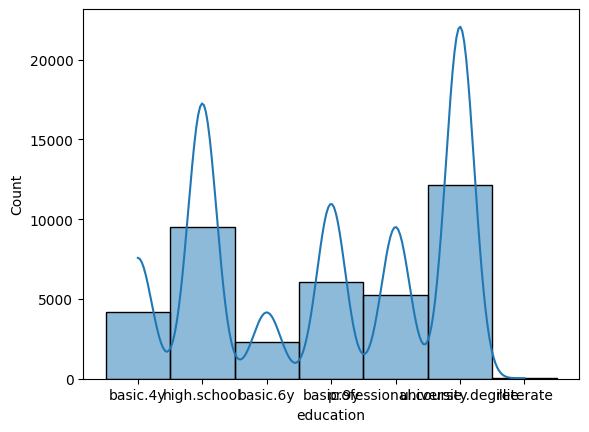

In [ ]:
import seaborn as sns
sns.histplot(data = df['education'],kde =True)

<Axes: xlabel='marital'>

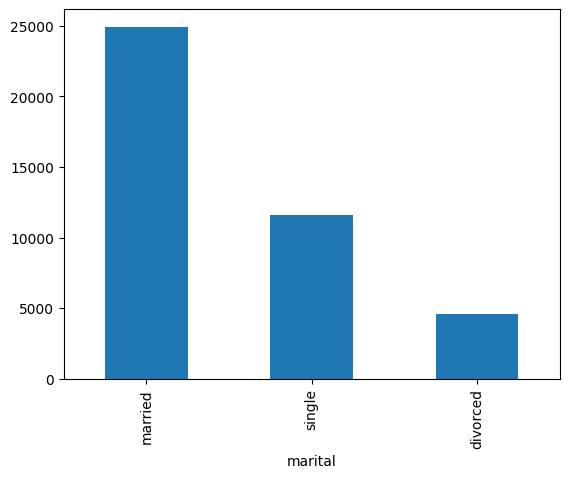

In [ ]:
df.marital.value_counts().plot(kind='bar')

<Axes: xlabel='education'>

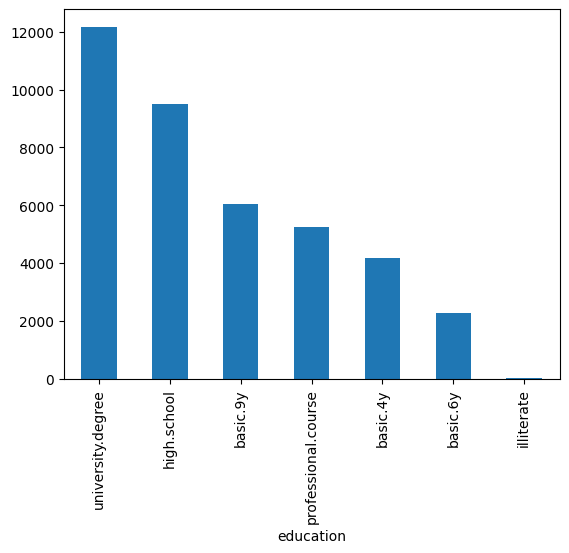

In [ ]:
df.education.value_counts().plot(kind='bar')

<Axes: xlabel='contact'>

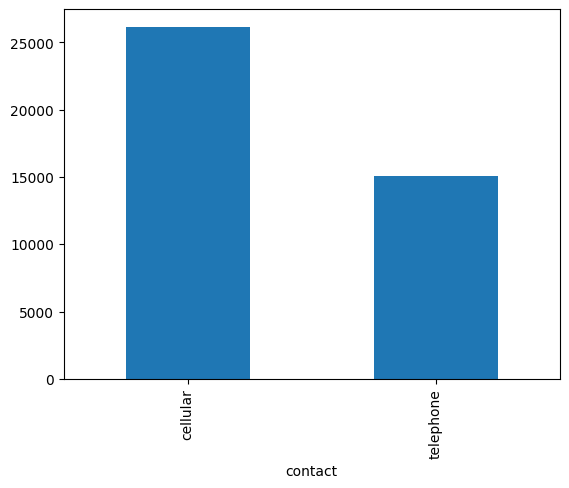

In [ ]:
df.contact.value_counts().plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5d35039e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5d3503af20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5d35039c60>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5d3503b850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5d3503a5c0>],
 'means': []}

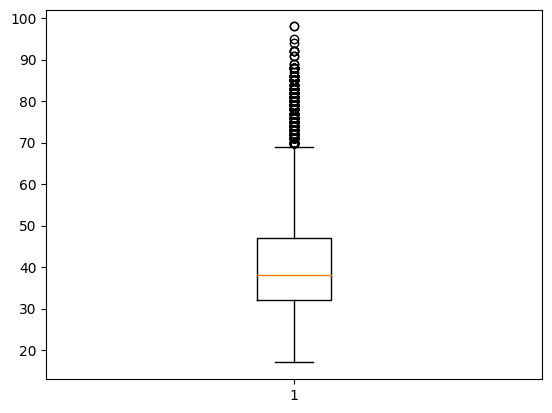

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5d34e1f010>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5d34e1dd20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5d34e1ce20>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5d34e1e8f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5d34e1db10>],
 'means': []}

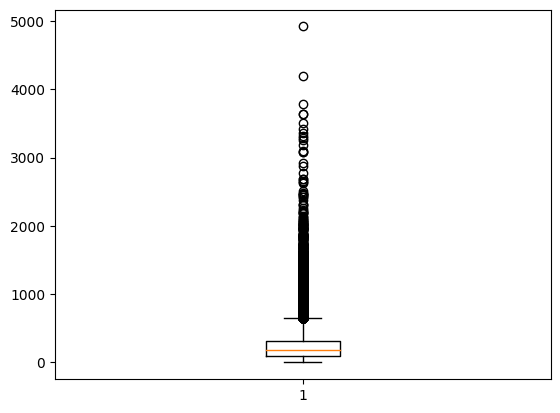

In [ ]:
plt.boxplot(df.duration)